In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import scipy.stats as stats

In [45]:
df = pd.read_csv("OutliersRemoved.csv")

In [46]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,22,5,2491,12,4,0,1,4,0,39,0,0
1,33,4,2727,12,2,3,0,4,0,12,0,0
2,21,2,13188,8,0,5,1,4,0,39,0,0
3,36,2,14354,6,2,5,0,2,0,39,0,0
4,11,2,18120,12,2,9,5,2,1,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29988,10,2,15471,11,2,12,5,4,1,37,0,0
29989,23,2,7555,8,2,6,0,4,0,39,0,1
29990,41,2,7377,8,6,0,4,4,1,39,0,0
29991,5,2,12060,8,4,0,3,4,0,19,0,0


Now we need to bring our data into normal distribution

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
def diagnostic_plots(df , variable):
    
    plt.figure(figsize =(15 , 6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable] , dist='norm' , plot = plt)
    plt.xlabel(variable)
    plt.show()

    

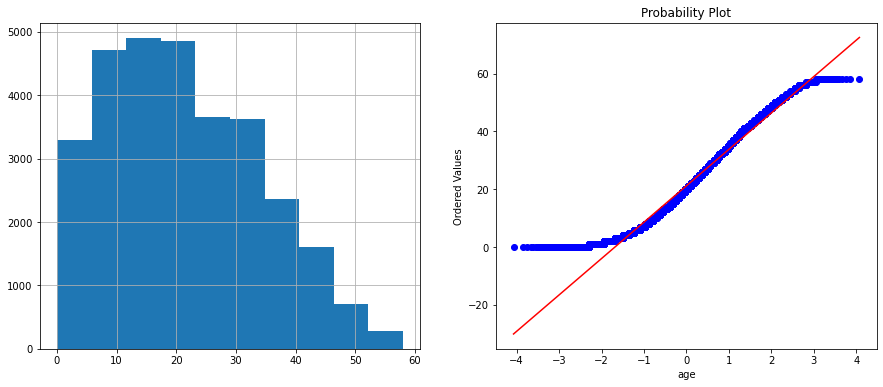

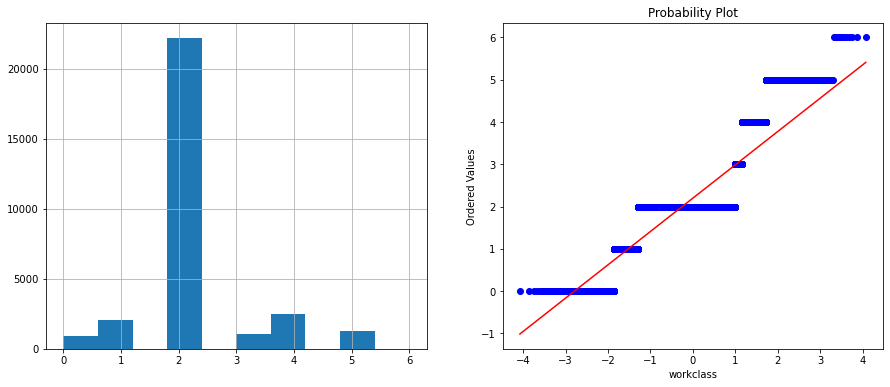

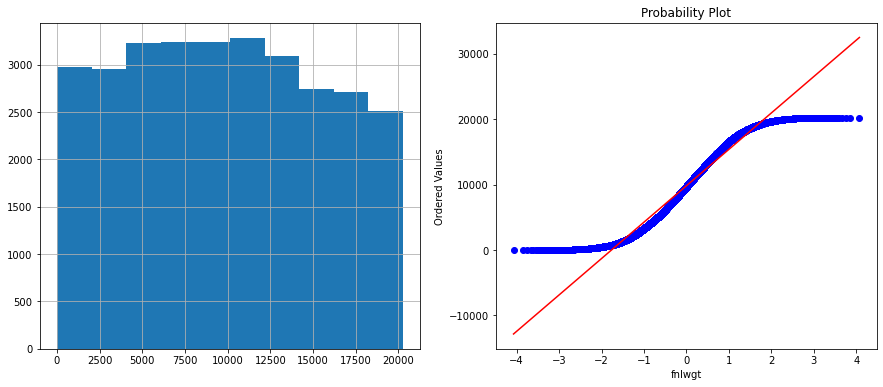

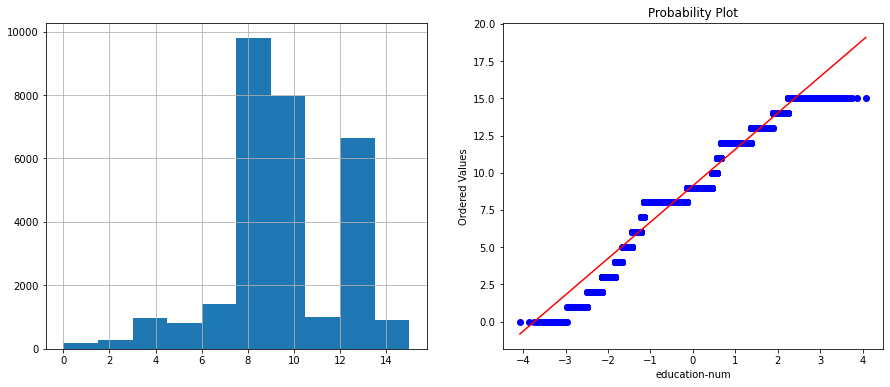

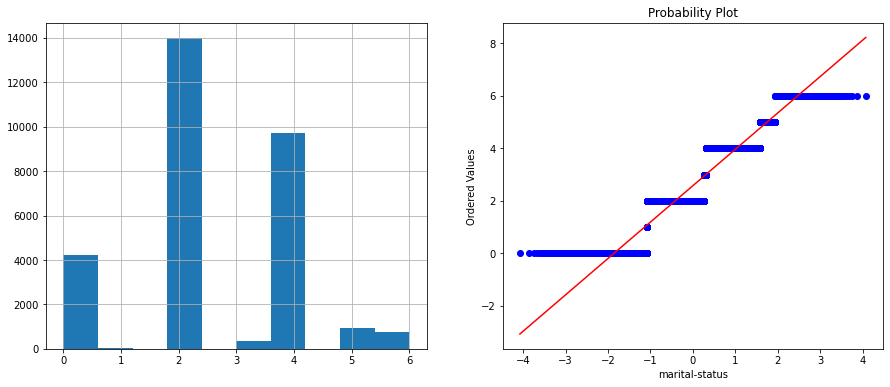

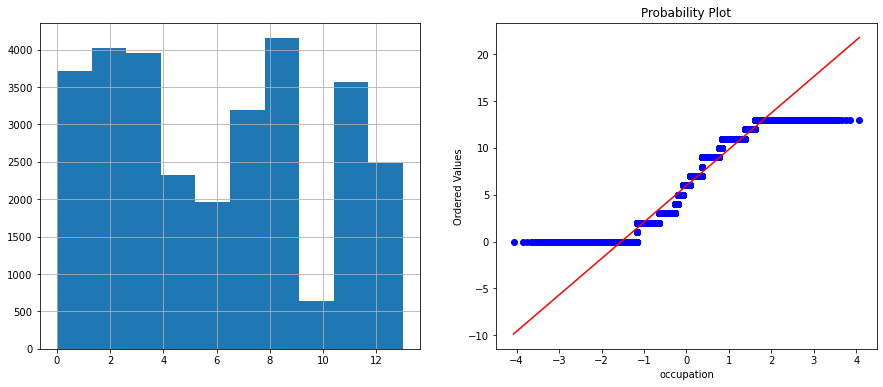

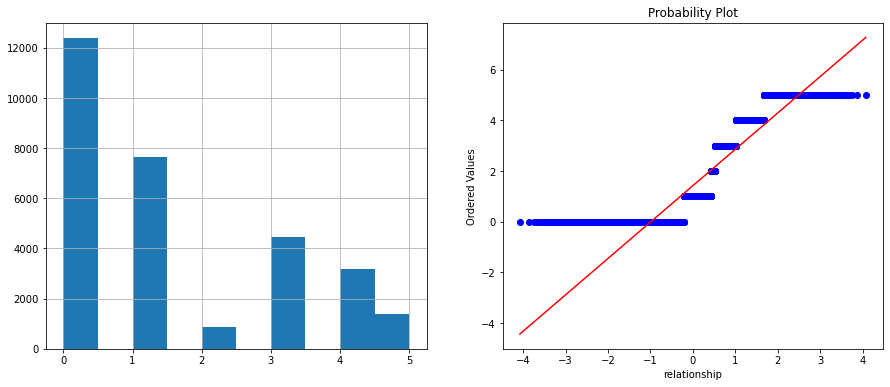

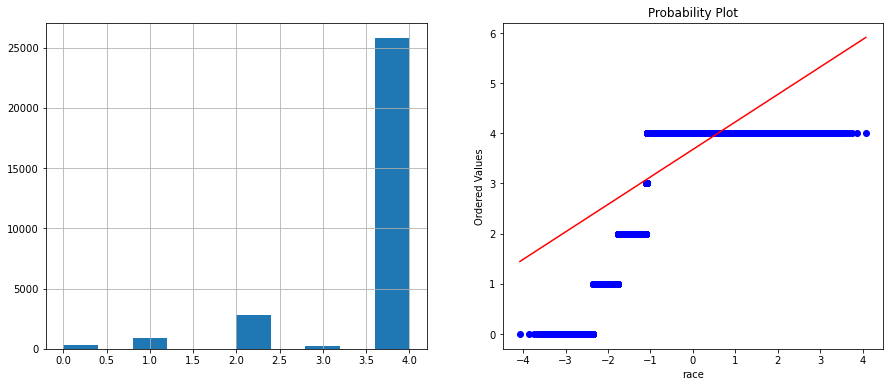

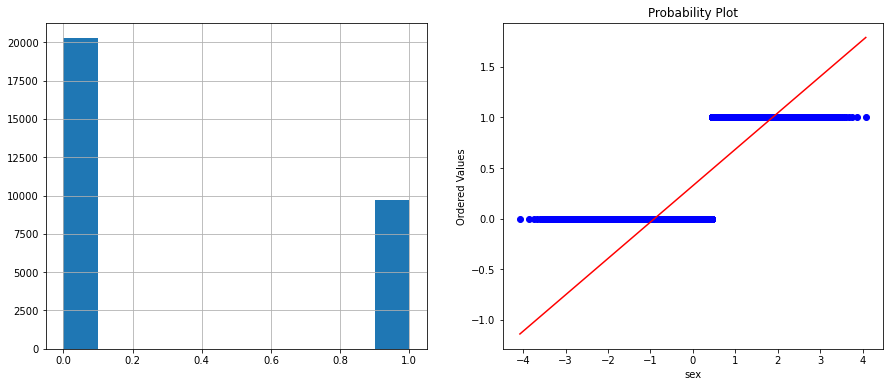

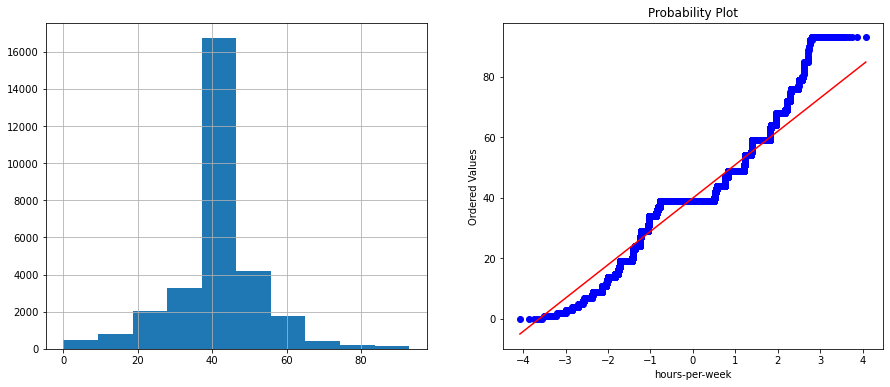

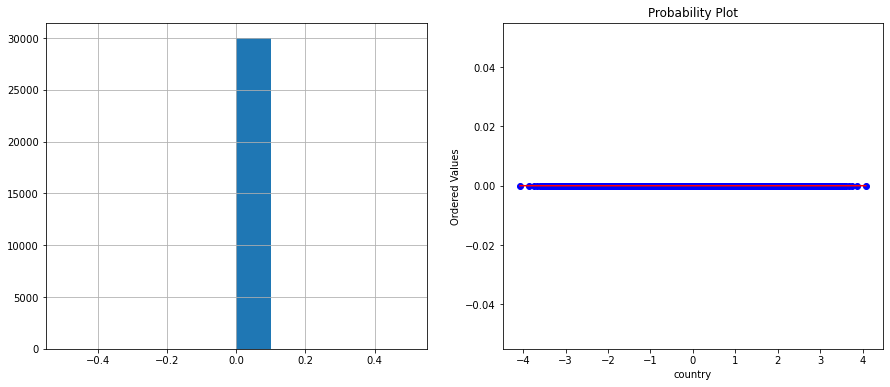

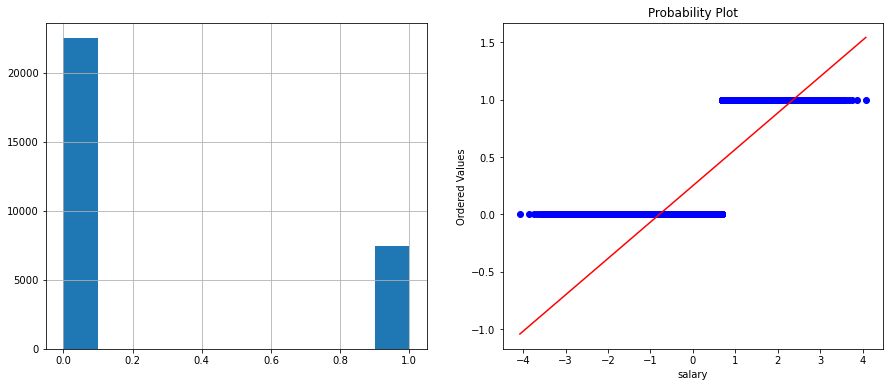

In [21]:
for feautre in df.columns:
    diagnostic_plots(df , feautre)
    

As we can see that some of the features are not normally distributed. 
Performing data normalization on fnlwgt , education_num ,martial_status , occupation , hours_per_week , releationship and race columns.

In [105]:
df_new = df.copy()

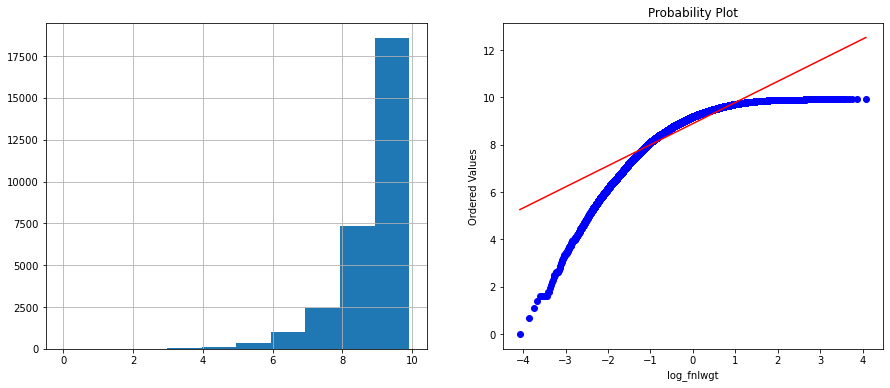

In [107]:
df_new['log_fnlwgt'] = np.log(df_new['fnlwgt']+1)
diagnostic_plots(df_new , 'log_fnlwgt')

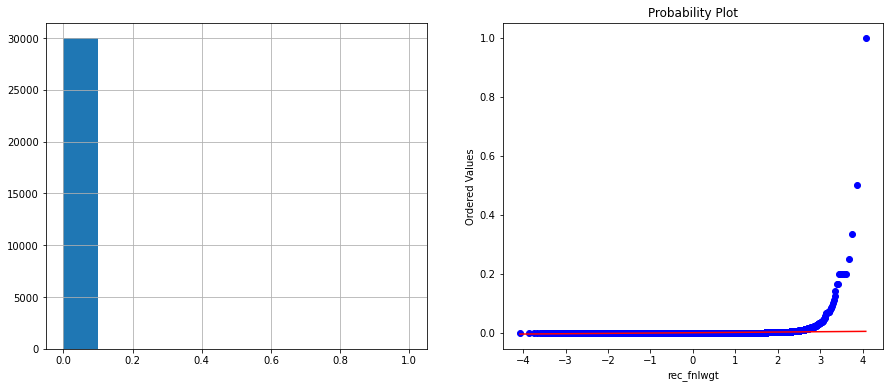

In [108]:
df_new['rec_fnlwgt'] = 1/(df_new['fnlwgt']+1)
diagnostic_plots(df_new , 'rec_fnlwgt')

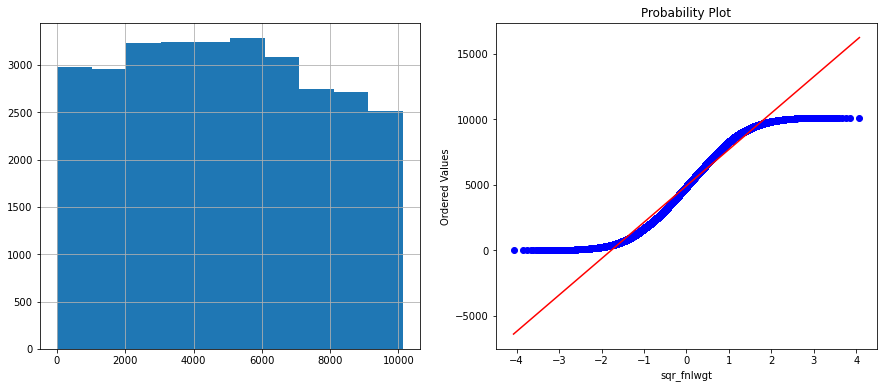

In [109]:
df_new['sqr_fnlwgt'] = df_new['fnlwgt']**1/2
diagnostic_plots(df_new , 'sqr_fnlwgt')

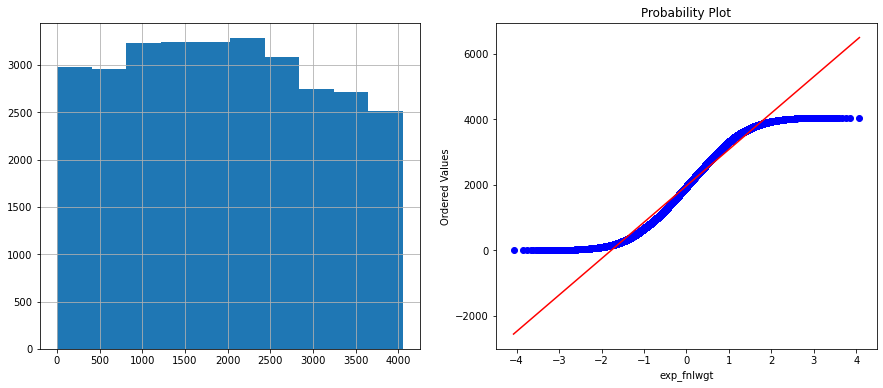

In [111]:
df_new['exp_fnlwgt'] = df_new['fnlwgt']**1/5
diagnostic_plots(df_new , 'exp_fnlwgt')

Optimal lambda:  0.6958698954867402


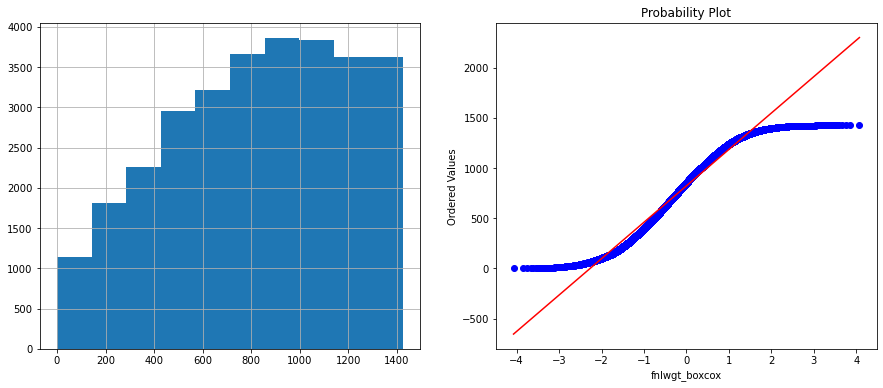

In [112]:
df_new['fnlwgt_boxcox'], param = stats.boxcox(df_new.fnlwgt+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df_new, 'fnlwgt_boxcox')

Looking at the above transformation for the "fnlwgt" column it is clear that the original data is good enough to be used for further analysis , as no other transformation are more efficient.

Performing the above samme transformation on education_num column

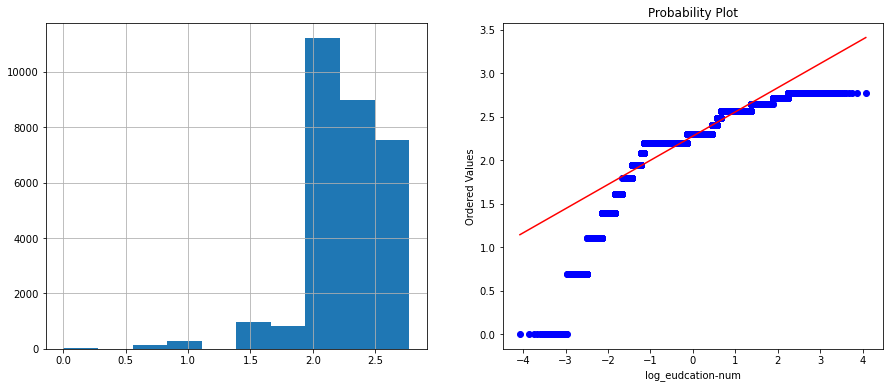

In [114]:
df_new['log_eudcation-num'] = np.log(df_new['education-num']+1)
diagnostic_plots(df_new , 'log_eudcation-num')

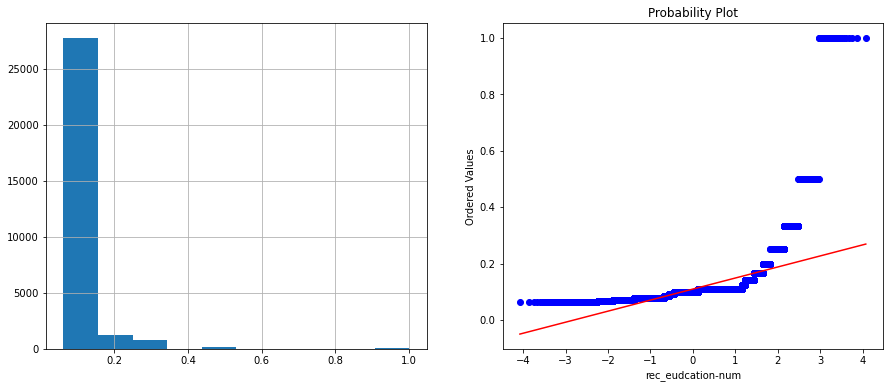

In [115]:
df_new['rec_eudcation-num'] = 1/(df_new['education-num']+1)
diagnostic_plots(df_new , 'rec_eudcation-num')

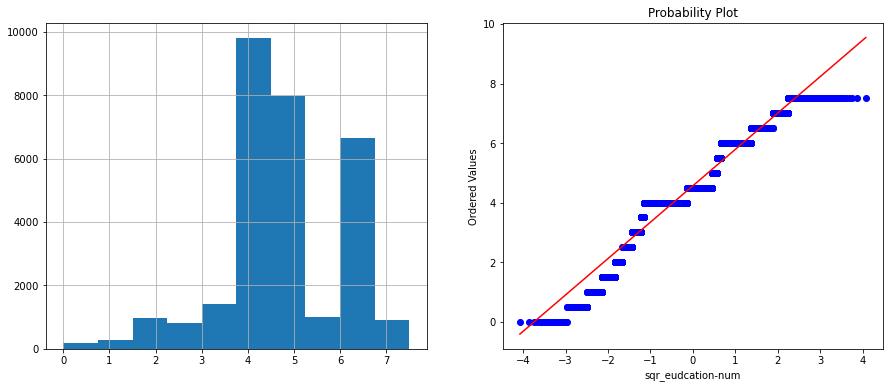

In [116]:
df_new['sqr_eudcation-num'] = df_new['education-num']**1/2
diagnostic_plots(df_new , 'sqr_eudcation-num')

In [ ]:
df_new['log_eudcation-num'] = np.log(df_new['education-num']+1)
diagnostic_plots(df_new , 'log_eudcation-num')